In [41]:
# standardized modules
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split

#my modules
import src.acquire as ac
import src.prepare as pp

In [2]:
#from Users/CryanRedrose/py/env/env import get_db_url
# /Users/CryanRedrose
#sys.path.append('/path/to/application/app/folder')

# from py.modules import get_db_url

### Exercise item #4: 
#### Create a pandas dataframe, df_iris, from this data.
- print the first 3 rows
- print the number of rows and columns (shape)
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables

In [3]:
df_iris = sns.load_dataset('iris')

In [4]:
print(df_iris.head(3))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa


In [5]:
print(df_iris.shape)

(150, 5)


In [6]:
print(df_iris.info)

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>


In [7]:
print(df_iris.columns.to_list())

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


In [8]:
print('List of column names:',*list(df_iris), sep = "\n")

List of column names:
sepal_length
sepal_width
petal_length
petal_width
species


In [9]:
print(df_iris.dtypes)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [10]:
print(df_iris.describe().T)

              count      mean       std  min  25%   50%  75%  max
sepal_length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal_width   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal_length  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal_width   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5


### Exercise item #5:
#### Read the data from this google sheet into a dataframe, df_google
- print the first 3 rows
- print the number of rows and columns
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables
- print the unique values for each of your categorical variables

In [11]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)
print(df_google.head(3).to_string(index=False))

 PassengerId  Survived  Pclass                                                Name    Sex  Age  SibSp  Parch           Ticket    Fare Cabin Embarked
           1         0       3                             Braund, Mr. Owen Harris   male 22.0      1      0        A/5 21171  7.2500   NaN        S
           2         1       1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0      1      0         PC 17599 71.2833   C85        C
           3         1       3                              Heikkinen, Miss. Laina female 26.0      0      0 STON/O2. 3101282  7.9250   NaN        S


In [12]:
print('List of column names:',*list(df_google), sep = "\n")

List of column names:
PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [13]:
print(df_google.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [14]:
print(df_google.describe().T)

             count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp          8.0000  
Parch          6.0000  
Fare         512.3292  


In [15]:
print('First five unique values for the "name" column:',*df_google.Name.head().unique(), sep = "\n")

First five unique values for the "name" column:
Braund, Mr. Owen Harris
Cumings, Mrs. John Bradley (Florence Briggs Thayer)
Heikkinen, Miss. Laina
Futrelle, Mrs. Jacques Heath (Lily May Peel)
Allen, Mr. William Henry


In [16]:
print(*df_google.Sex.unique(), sep = '\n')

male
female


In [17]:
print('First five unique values for the "Ticket" column:',*df_google.Ticket.head().unique(), sep = '\n')

First five unique values for the "Ticket" column:
A/5 21171
PC 17599
STON/O2. 3101282
113803
373450


In [18]:
print('First five unique values for the "Cabin" column:',*df_google.Cabin.unique()[:5], sep = '\n')

First five unique values for the "Cabin" column:
nan
C85
C123
E46
G6


In [19]:
for col in df_google.columns:

    if df_google[col].dtypes == 'object':
        print(f'{col} has {df_google[col].nunique()} unique values.')

Name has 891 unique values.
Sex has 2 unique values.
Ticket has 681 unique values.
Cabin has 147 unique values.
Embarked has 3 unique values.


### Exercise itm #6.
#### Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.

- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

In [20]:
df_excel = pd.read_excel('~/py/data/train.xlsx', sheet_name='train')

In [21]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
df_excel_sample = df_excel.head(100)

In [23]:
df_excel_sample.shape

(100, 12)

In [24]:
df_excel.shape[0]

891

In [25]:
df_excel.columns[:5]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

In [26]:
print(*df_excel.select_dtypes(include='object').columns.tolist(), sep = '\n')

Name
Sex
Ticket
Cabin
Embarked


### Make a new python module, acquire.py to hold the following data aquisition functions:
- Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

In [39]:
''' Commenting this block out so I can use acquire.py without issue
def new_titanic_data():
    
    #This function reads the titanic data from the Codeup db into a df.
    
    # Create SQL query.
    sql_query = 'SELECT * FROM passengers'
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_db_url('titanic_db'))
    
    return df
'''

" Commenting this block out so I can use acquire.py without issue\ndef new_titanic_data():\n    \n    #This function reads the titanic data from the Codeup db into a df.\n    \n    # Create SQL query.\n    sql_query = 'SELECT * FROM passengers'\n    \n    # Read in DataFrame from Codeup db.\n    df = pd.read_sql(sql_query, get_db_url('titanic_db'))\n    \n    return df\n"

In [40]:
''' Commenting this block out so I can use acquire.py without issue
def get_titanic_data():
    
    #This function reads in titanic data from Codeup database, writes data to
    #a csv file if a local file does not exist, and returns a df.
    
    if os.path.isfile('py/data/titanic_df.csv'):
        
        # If csv file exists, read in data from csv file.
        df = pd.read_csv('py/data/titanic_df.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame.
        df = new_titanic_data()
        
        # Write DataFrame to a csv file.
        df.to_csv('py/data/titanic_df.csv')
        
    return df
'''

" Commenting this block out so I can use acquire.py without issue\ndef get_titanic_data():\n    \n    #This function reads in titanic data from Codeup database, writes data to\n    #a csv file if a local file does not exist, and returns a df.\n    \n    if os.path.isfile('py/data/titanic_df.csv'):\n        \n        # If csv file exists, read in data from csv file.\n        df = pd.read_csv('py/data/titanic_df.csv', index_col=0)\n        \n    else:\n        \n        # Read fresh data from db into a DataFrame.\n        df = new_titanic_data()\n        \n        # Write DataFrame to a csv file.\n        df.to_csv('py/data/titanic_df.csv')\n        \n    return df\n"

In [33]:
titanic_df = get_titanic_data()

## Exploratory Analysis Section

### Exercises

### Part 1

### Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

### 1. Acquire, prepare & split your data.

In [43]:
iris_df = ac.get_iris_data()

In [45]:
iris = iris_df

In [46]:
i_train, i_validate, i_test = pp.prep_iris(iris)

In [50]:
i_train.head(2)

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
79,versicolor,5.7,2.6,3.5,1.0,0,1,0
36,setosa,5.5,3.5,1.3,0.2,1,0,0


In [49]:
i_train.shape, i_validate.shape, i_test.shape

((84, 8), (36, 8), (30, 8))

### 2. Univariate Stats

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

- Document takeaways & any actions.

In [66]:
i_train.describe()

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,5.870238,3.075000,3.771429,1.203571,0.333333,0.333333,0.333333
std,0.769099,0.448256,1.734940,0.752577,0.474236,0.474236,0.474236
min,4.400000,2.200000,1.200000,0.100000,0.000000,0.000000,0.000000
25%,5.375000,2.800000,1.600000,0.400000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.250000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.400000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


In [89]:
for i in i_num_var:
    print(i_train[i].describe())
    print()

count    84.000000
mean      5.870238
std       0.769099
min       4.400000
25%       5.375000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64

count    84.000000
mean      3.075000
std       0.448256
min       2.200000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.400000
Name: sepal_width, dtype: float64

count    84.000000
mean      3.771429
std       1.734940
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64

count    84.000000
mean      1.203571
std       0.752577
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64



In [70]:
i_cat_var = i_train.columns[5:].tolist()
i_cat_var

['setosa', 'versicolor', 'virginica']

In [72]:
i_num_var = i_train.columns[1:5].tolist()
i_num_var

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

setosa
0    56
1    28
Name: setosa, dtype: int64
0    66.666667
1    33.333333
Name: setosa, dtype: float64


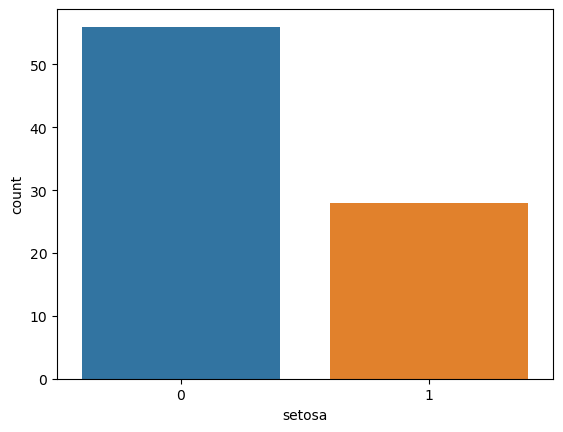

versicolor
0    56
1    28
Name: versicolor, dtype: int64
0    66.666667
1    33.333333
Name: versicolor, dtype: float64


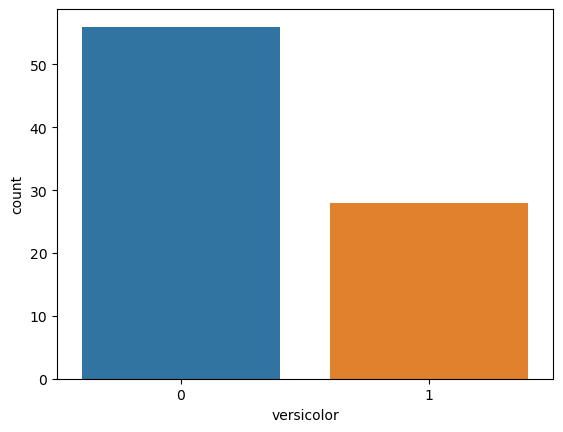

virginica
0    56
1    28
Name: virginica, dtype: int64
0    66.666667
1    33.333333
Name: virginica, dtype: float64


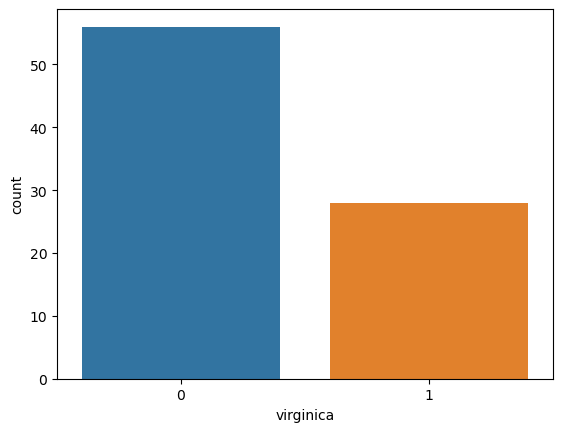

In [73]:
for i in i_cat_var:
    print(i)
    print(i_train[i].value_counts())
    print(i_train[i].value_counts(normalize=True)*100)
    sns.countplot(x=i, data=i_train)
    plt.show()

sepal_length


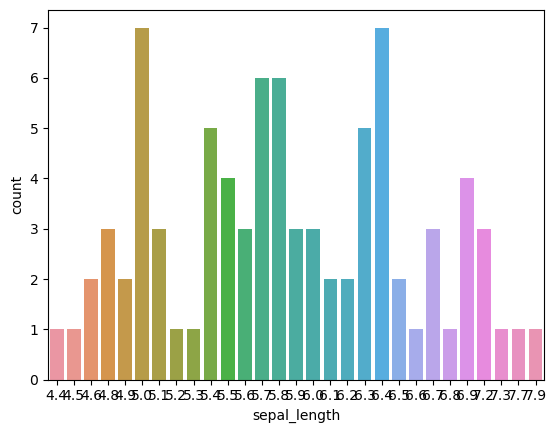

sepal_width


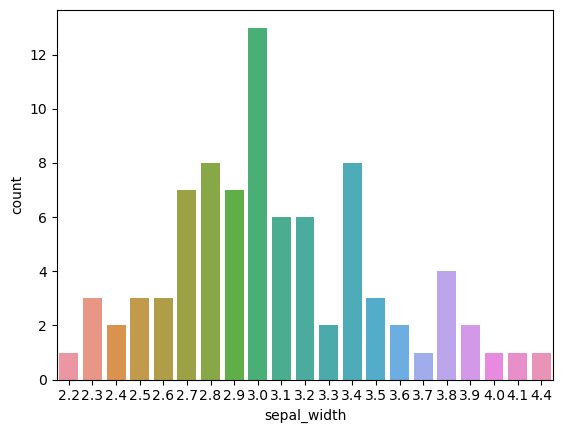

petal_length


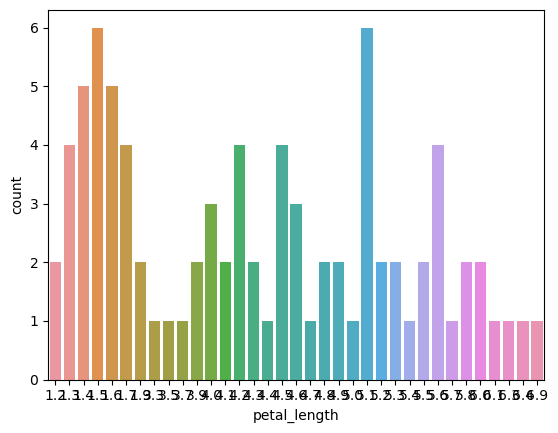

petal_width


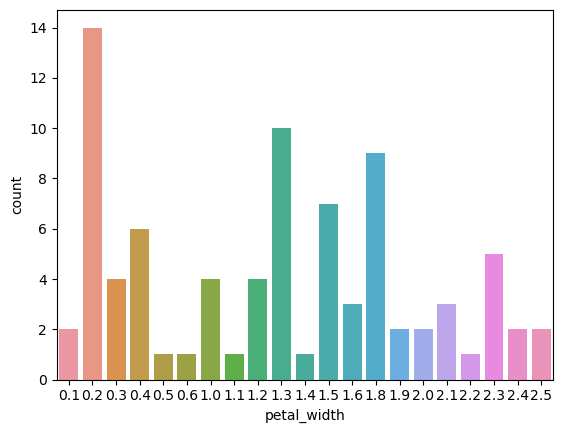

In [75]:
for i in i_num_var:
    print(i)
    #print(i_train[i].value_counts())
    #print(i_train[i].value_counts(normalize=True)*100)
    sns.countplot(x=i, data=i_train)
    plt.show()

In [97]:
i_train.head(2)

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
79,versicolor,5.7,2.6,3.5,1.0,0,1,0
36,setosa,5.5,3.5,1.3,0.2,1,0,0


In [98]:
i_train.melt(id_vars = 'setosa','versicolor','virginica')

SyntaxError: positional argument follows keyword argument (160949716.py, line 1)